# Project
#### Group Members

| ID | Name | 
|----------|----------|
|1191302190|Amin Ahmed Mohammedelhassan Alawad|
|1191202335|Ayat Abdulaziz Gaber Al-Khulaqi|
|1191202539|Iven Low Zi Yin |



# Reqiurement  

**To discover hidden patterns, your work should incorporate at least three classification
techniques, one clustering and association rule mining techniques.**

 - Planning of code and analysis
 - Exploratory data analysis
 - Reasoning about data and model chosen
 - Programming execution and reproducibility of results
 - Programming Clarity

#### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skew

import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

In [105]:
color = '#7858A6'

#### read the data

In [3]:
df = pd.read_csv("msr3.csv")

# Overview

In [4]:
df.shape

(7178, 31)

In [5]:
df.head()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
0,Brazil,1,21.0,2.0,0,0,5,3,1,4,...,1,1,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1,2,...,2,2,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1,4,...,1,1,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1,2,...,2,2,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1,3,...,2,1,3,2,3,2,1,1,1,1


In [6]:
df.tail()

,country,gender,age,yr_mrr,chd,chda,edu,physio,raf,rel,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
7173,Uganda,1,32.0,7.0,2,3,5,1,10,4,...,3,3,2,2,2,7,2,2,2,7
7174,Uganda,1,36.0,6.0,4,4,5,3,,4,...,2,2,2,2,2,3,3,2,1,1
7175,Uganda,1,32.0,2.0,1,1,5,2,,1,...,1,1,1,1,4,2,1,2,4,2
7176,Uganda,1,27.0,3.0,2,2,5,2,,1,...,1,2,1,2,3,4,3,3,2,3
7177,Uganda,1,53.0,24.0,6,1,5,3,,2,...,3,3,1,1,2,3,1,1,2,5


# Data Cleaning and Preprocessing

## Overview of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7178 non-null   object 
 1   gender   7178 non-null   int64  
 2   age      7178 non-null   float64
 3   yr_mrr   7178 non-null   float64
 4   chd      7178 non-null   int64  
 5   chda     7178 non-null   int64  
 6   edu      7178 non-null   int64  
 7   physio   7178 non-null   int64  
 8   raf      7178 non-null   object 
 9   rel      7178 non-null   int64  
 10  safety   7178 non-null   int64  
 11  love4    7178 non-null   int64  
 12  happy    7178 non-null   int64  
 13  esteem2  7178 non-null   int64  
 14  love5    7178 non-null   int64  
 15  love3    7178 non-null   int64  
 16  esteem1  7178 non-null   int64  
 17  sact     7178 non-null   int64  
 18  love2    7178 non-null   int64  
 19  love1    7178 non-null   int64  
 20  ms1      7178 non-null   int64  
 21  ms2      7178 

In [16]:
df.describe()

,gender,age,yr_mrr,chd,chda,edu,physio,rel,safety,love4,...,ms2,ms3,scoll1,scoll2,scoll3,scoll4,icoll1,icoll2,icoll3,icoll4
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,...,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,1.533157,40.665018,14.760102,1.766648,1.466982,4.242965,2.616606,3.962803,3.656729,1.442045,...,2.227919,2.281833,2.492338,1.986486,3.547088,2.683199,2.192254,1.885483,3.398440,2.989412
std,0.498934,11.446824,11.587541,1.307748,1.383066,0.949635,0.838241,1.777629,1.951630,0.804958,...,1.460221,1.494538,1.460362,1.430655,1.819215,1.766169,1.529274,1.470525,1.959335,1.922027
min,1.000000,17.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,32.000000,5.000000,1.000000,0.000000,4.000000,2.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,12.000000,2.000000,1.000000,5.000000,3.000000,4.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000
75%,2.000000,49.000000,23.000000,2.000000,2.000000,5.000000,3.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,2.000000,5.000000,4.000000
max,2.000000,88.000000,70.000000,12.000000,13.000000,5.000000,6.000000,7.000000,7.000000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


**Note:** The data appears to be consistent, complete, and does not have any missing values.

## Checking for duplicates

In [8]:
sum(df.duplicated())

56

 **Note:** The data was collected from a survey. Each row represents an individual state, even if it is repeated or duplicated. Therefore, dropping the duplicated rows is not required.

## Checking for missing values

In [9]:
df.isna().sum()

country    0
gender     0
age        0
yr_mrr     0
chd        0
chda       0
edu        0
physio     0
raf        0
rel        0
safety     0
love4      0
happy      0
esteem2    0
love5      0
love3      0
esteem1    0
sact       0
love2      0
love1      0
ms1        0
ms2        0
ms3        0
scoll1     0
scoll2     0
scoll3     0
scoll4     0
icoll1     0
icoll2     0
icoll3     0
icoll4     0
dtype: int64

**Note:** There are no missing values in the data.

## skewness analysis

####  Calculate skewness

In [11]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_results = {}

for column in numeric_columns:
    skewness_results[column] = skew(df[column])

df_skewness = pd.DataFrame.from_dict(skewness_results, orient='index', columns=['Skewness'])

#### Plot skewness values with custom color

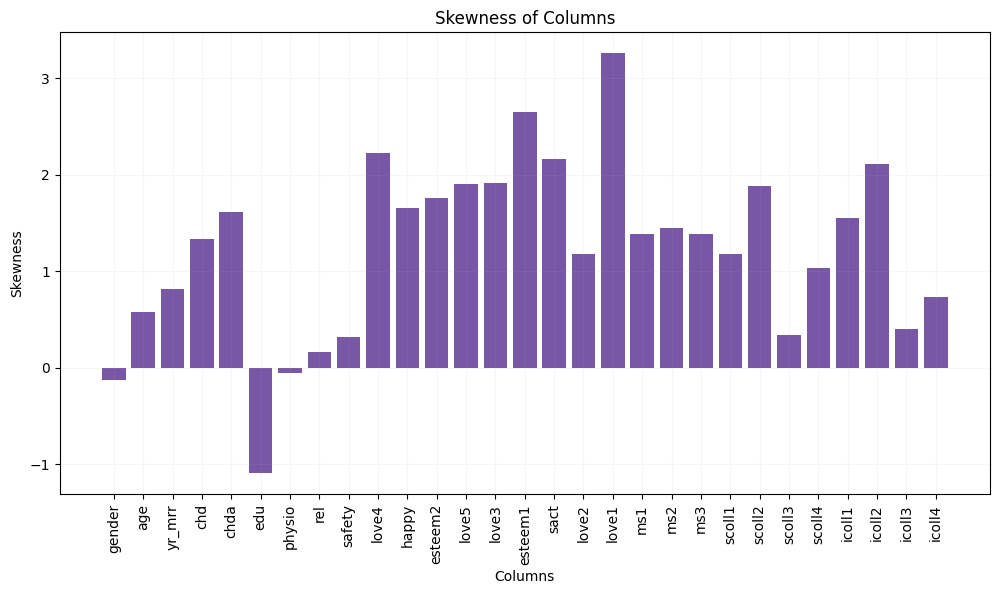

In [109]:
plt.figure(figsize=(12, 6))
plt.bar(df_skewness.index, df_skewness['Skewness'], color=color)  
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.xticks(rotation=90)
plt.grid(alpha=0.1)
plt.show()

#### Separate right-skewed and left-skewed columns

In [13]:
right_skewed = df_skewness[df_skewness['Skewness'] > 0.5]
left_skewed = df_skewness[df_skewness['Skewness'] < -0.5]

**Note:** Skewness values close to 0 (between -0.5 and 0.5) indicate that the distribution is approximately symmetric

#### Plot right-skewed columns

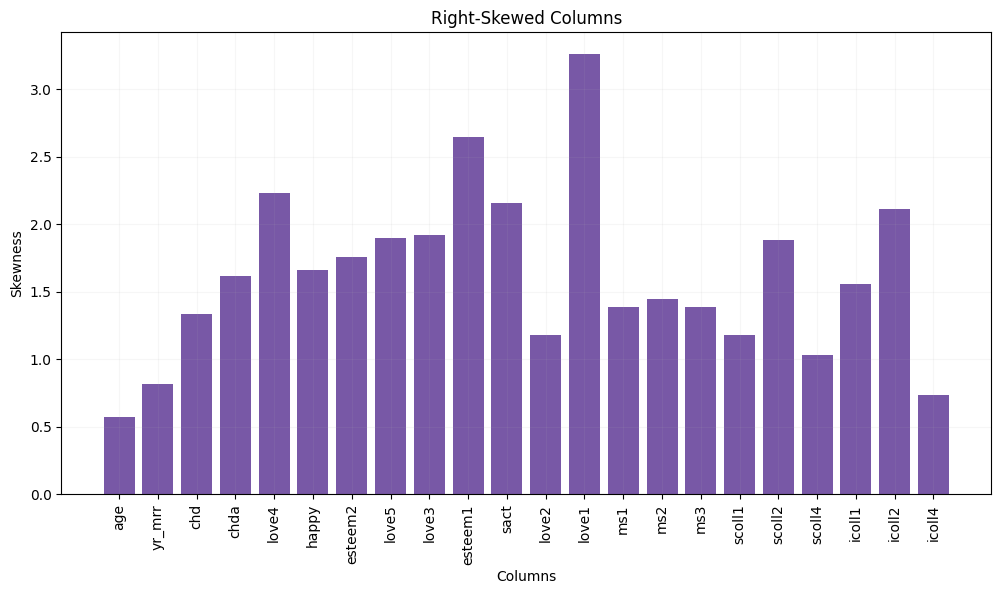

In [108]:
plt.figure(figsize=(12, 6))
plt.bar(right_skewed.index, right_skewed['Skewness'], color=color)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Right-Skewed Columns')
plt.xticks(rotation=90)
plt.grid(alpha=0.1)
plt.show()

#### Plot left-skewed columns

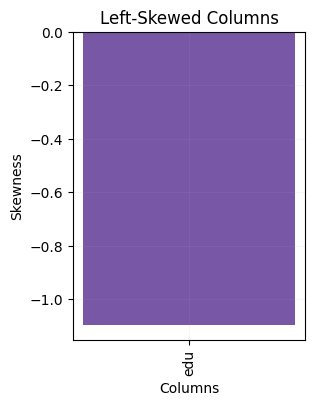

In [110]:
plt.figure(figsize=(3, 4))
plt.bar(left_skewed.index, left_skewed['Skewness'], color=color)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Left-Skewed Columns')
plt.xticks(rotation=90)
plt.grid(alpha=0.1)
plt.show()

**Note:** While skewed data can still provide valuable insights and meaningful interpretations, it is important to consider the implications of skewness in the marriage survey data. The skewed distribution of responses may reflect the diverse range of experiences and attitudes towards marriage.

Given the skewness in the data, using non-linear models would be a wise choice since linear models rely on the assumption of normally distributed data.

## Feature Scaling

# Exploratory Data Analysis

### General Ploting

#### Gender comparison

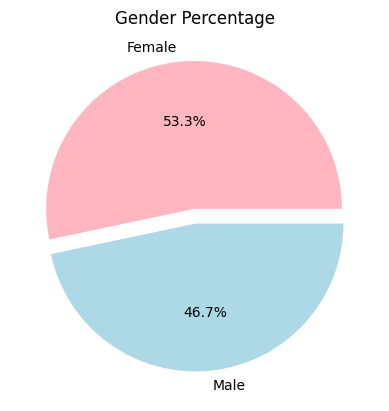

In [62]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=["Female", "Male"],
        autopct='%1.1f%%', colors=['lightpink', 'lightblue'], explode=(0.05, 0.05))

plt.title('Gender Percentage')

plt.show()

#### Age distribution 

#### Age compered to Yeasrs of marrige

#### Count Number of samples in each country

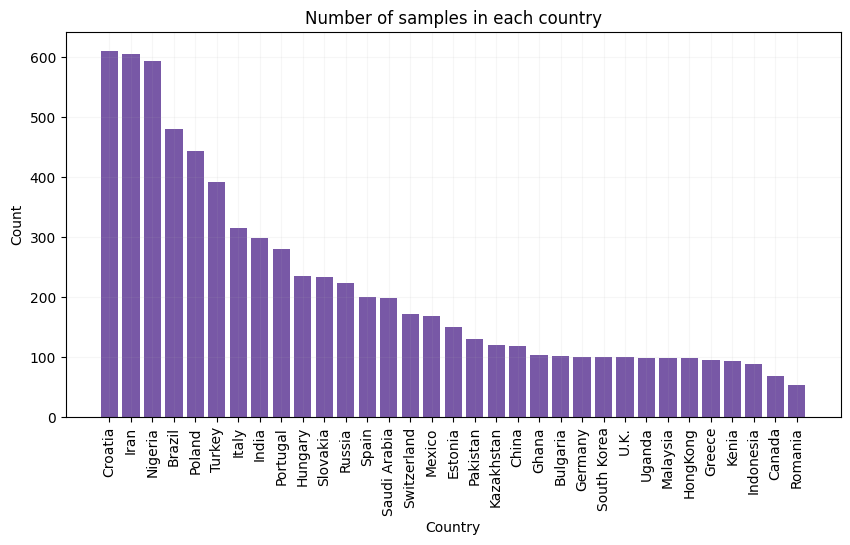

In [113]:
country_counts = df['country'].value_counts()

plt.figure(figsize = (10,5))
plt.bar(country_counts.index, country_counts.values, color = color)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of samples in each country')
plt.xticks(rotation=90)
plt.grid(alpha=0.1)

plt.show()


### Ploting the countries on the Map

#### initialize map objects

In [29]:
country_counts = df['country'].value_counts()
map = folium.Map()
geolocator = Nominatim(user_agent="my_map")
marker_cluster = MarkerCluster().add_to(map)

#### Iterate through each country and count number of rows then set its location in the map 

In [31]:
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    country_count = country_counts[country]
    
    try:
        location = geolocator.geocode(country)
        latitude = location.latitude
        longitude = location.longitude
        
        # Create a marker for the country with a popup displaying the count
        folium.Marker(location=[latitude, longitude], popup=f'{country}: {country_count}').add_to(marker_cluster)
    except:
        continue

#### Display the map

In [33]:
map

### correlation matrix

### Heat map

# Feature Selection 

# Model Selection

# Model Training and Evaluation

# Interpretation of Results